# Week 2 - Implementation of Shaffer et al

In [1]:
# This line tells matplotlib to include plots here
%matplotlib inline
import numpy as np # We'll need numpy later
from scipy.stats import kstest, ttest_ind, ks_2samp, zscore
import matplotlib.pyplot as plt # This lets us access the pyplot functions

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In Python we can use a random number generator whose numbers will be chosen from the desired normal distribution by using the function `np.random.normal`. Sample from this normal distribution from n=1 to 50 (i.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

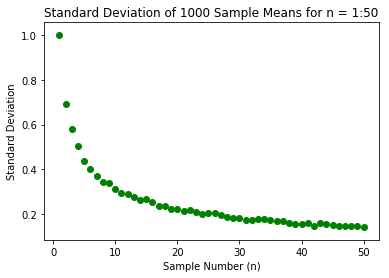

In [2]:
# Initialize
distmean = np.zeros(1000) # initialize vector to store 1000 means
#stnormdistmean  = np.zeros(1000) # initialize vector to store 1000 normalized means
sig = np.zeros(50) # initialize vector to store st dev of 1000 means for each n
boxy = np.zeros((1000, 50))
x = np.linspace(1,50) # initialize vector 1 to 50 to represent n
mean = 5
stdev = 1
def KNormalDist(n): #iterate through 1000 random samples
    for i in range(1,1001): 
        dist = np.random.normal(mean, stdev, n) # generate distribution with mean = 5, st dev = 1, and n = 1:50
        distmean[i-1] = np.mean(dist)
        boxy[i-1, n-1] = distmean[i-1]
        #stnormdistmean[i-1] = (distmean[i-1]-mean)/stdev # use z score function instead
    sig[n-1] = np.std(distmean)

# Iterate through n=1-50, generating st dev of 1000 sample means
for n in range(1,51): # iterate through n=1:50
    KNormalDist(n) #iterate through 1000 random samples
                
plt.scatter(x, sig, color = 'g')
plt.xlabel("Sample Number (n)")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of 1000 Sample Means for n = 1:50");

#### 1a. Plot the standard deviation of the sample mean versus n. Add a second line which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

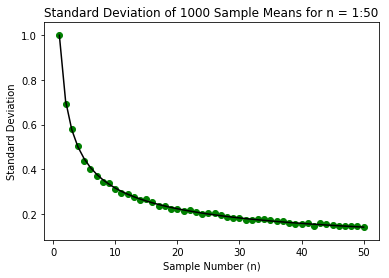

In [3]:
plt.scatter(x, sig, c='g')
plt.xlabel("Sample Number (n)")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of 1000 Sample Means for n = 1:50")
plt.plot(x,(1/np.sqrt(x)), c='k');
# Because 1/sqrt(n) closely fits the standard deviation of the sample means versus the sample number,
# I see that as n increases, the standard deviation decreases exponentially, increasing my ability to estimate the underlying mean

#### 1b. Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a (I.e. What information do you gain or lose in the two different plotting schemes)?

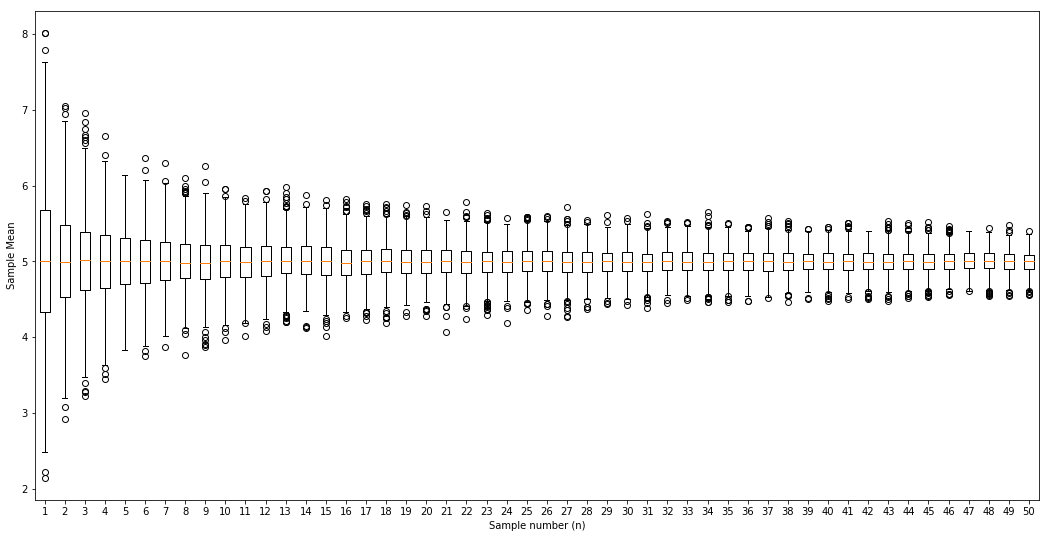

In [4]:
fig, ax = plt.subplots(figsize=(18,9))
ax.boxplot(boxy)
plt.xlabel('Sample number (n)')
plt.ylabel('Sample Mean')
plt.show()
# The orange line in the boxplot view for n=1 is the median sample mean from the 1000 trials
# The upper side of the box is the 75th  percentile and the lower side is the 25th percentile
# The upper and lower whiskers represent standard deviation above and below the mean
# The points above and below the upper and lower whisker bounds are the outliers that fall outside 2 standard deviations
# The box plots present the distribution of sample means in a more visually informative way than the in 1a, but plotting the standard deviations puts a number to each n
# Both methods demonstrate that variance decreases as n increases

#### 1c. For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to see if this sample distribution is normal. (Hint: you may need to translate this to the standard normal distribution.) Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

Sample mean = -0.000
Sample standard deviation = 1.000
p-value = 0.982


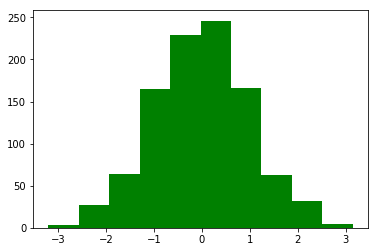

In [5]:
n = 3
KNormalDist(n) # generate normal distribution of 1000 values with n = 3
plt.hist(zscore(distmean), color='g'); # plot histogram of 1000 values from standard normal distribution

[statis, pvalu] = kstest(zscore(distmean), 'norm') # perform Kolmogorov-Smirnov test
print('Sample mean = %.3f' % np.mean(zscore(distmean)))
print('Sample standard deviation = %0.3f' %np.std(zscore(distmean)))
    #print('Statistics = %.3f' % statis)
print('p-value = %.3f' % pvalu)
# Because the p-value is above 0.05, I would accept the null hypothesis that the distribution is normal

#### 1d. Repeat 1c but for n=20. What changes when the number of samples increases?

Sample mean = 0.000
Sample standard deviation = 1.000
p-value = 0.920


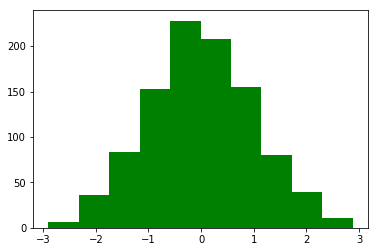

In [6]:
n = 20
KNormalDist(n) # generate normal distribution of 1000 values with n = 3
plt.hist(zscore(distmean), color='g'); # plot histogram of 1000 values from standard normal distribution

[statis, pvalu] = kstest(zscore(distmean), 'norm') # perform Kolmogorov-Smirnov test
print('Sample mean = %.3f' % np.mean(zscore(distmean)))
print('Sample standard deviation = %0.3f' %np.std(zscore(distmean)))
    #print('Statistics = %.3f' % statis)
print('p-value = %.3f' % pvalu)
# The variance of the plot appears to decrease, which makes sense with increased n.

## (2) Now we will explore sampling from an alternate distribution type.

#### 2a. Sample the Pareto distribution (`np.random.pareto`) with parameter shape = 2, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

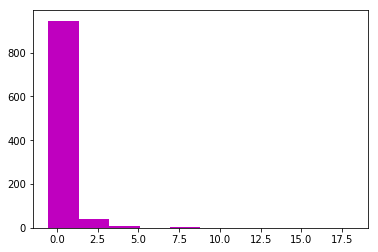

In [7]:
def KParetoDist(shape,n): #iterate through 1000 random samples
    for i in range(1,1001): 
        dist = np.random.pareto(shape, n) # generate pareto distribution
        distmean[i-1] = np.mean(dist)
        boxyPareto[i-1, n-1] = distmean[i-1]
    yPareto[n-1] = np.std(distmean)
    
distmean = np.zeros(1000) # initialize vector to store 1000 means
boxyPareto = np.zeros((1000, 50))
yPareto = np.zeros(50)
shape = 2
n = 1 # sample number = 1

KParetoDist(shape,n) #iterate through 1000 random samples

plt.hist(zscore(distmean), color='m');
# The Pareto distribution does not resemble a normal distribution. It is heavily skewed right. 
# 80% of values in a Pareto distribution are in the bottom 20% range and the other 20% of values are in the upper 80% of the range.

#### 2b. As in problem 1, plot a boxplot of the sample distribution from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

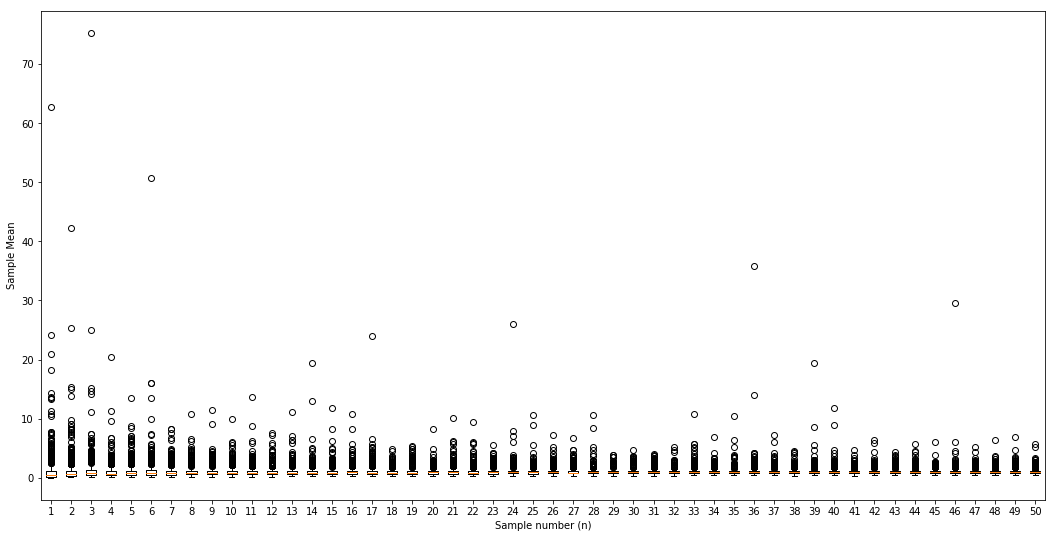

In [8]:
for n in range(1,51):
    KParetoDist(2,n)
fig, ax = plt.subplots(figsize=(18,9))
ax.boxplot(boxyPareto)
plt.xlabel('Sample number (n)')
plt.ylabel('Sample Mean')
plt.show()
# Because the pareto distribution is so heavily skewed right, the median values are all very close to zero.
# The deviation of the box plots become smaller as n increases, which makes sense.

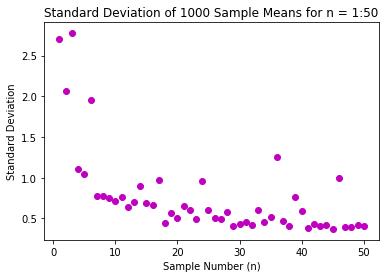

In [9]:
x = np.linspace(1,50) # initialize vector 1 to 50 to represent n
plt.scatter(x, yPareto, c='m')
plt.xlabel("Sample Number (n)")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of 1000 Sample Means for n = 1:50");
# The scatter plot of standard deviation gives values for standard deviation while the box plot conveys the deviation more visually with the spread of outliers and length of the whiskers.

#### 2c. For n=3, plot the histogram of the sample means. What is this distribution, is it Pareto or normal? Report your test results.

Sample mean = 0.000
Sample standard deviation = 1.000
p-value = 0.000000e+00


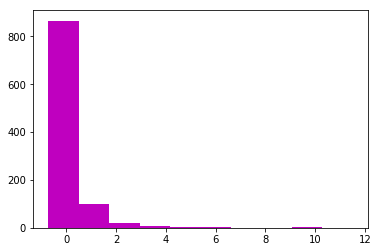

In [10]:
n = 3
shape = 2
KParetoDist(shape,n)
plt.hist(zscore(distmean), color='m');

[stat, pvalue] = kstest(zscore(distmean), 'norm') # perform Kolmogorov-Smirnov test
print('Sample mean = %.3f' % np.mean(zscore(distmean)))
print('Sample standard deviation = %0.3f' %np.std(zscore(distmean)))
print('p-value = %e' % pvalue)
# The distribution is not normal because the KS test, which assumes normality, yields a p-value less than 0.05, indicating the distribution is not normal.
# In this case, it is thus the Pareto distribution

#### 2d. Repeat 2b and 2c for n=100.

Sample mean = -0.000
Sample standard deviation = 1.000
p-value = 2.442491e-15


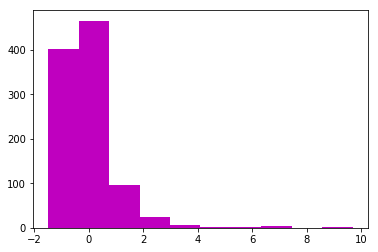

In [11]:
n = 100
shape = 2
for i in range(1,1001): 
    dist = np.random.pareto(shape, n) # generate pareto distribution
    distmean[i-1] = np.mean(dist)
plt.hist(zscore(distmean), color='m');
    
[statis, pvalue] = kstest(zscore(distmean), 'norm') # perform Kolmogorov-Smirnov test
print('Sample mean = %.3f' % np.mean(zscore(distmean)))
print('Sample standard deviation = %0.3f' %np.std(zscore(distmean)))
print('p-value = %e' % pvalue)
# The distribution is not normal because the KS test, which assumes normality, yields a p-value less than 0.05, indicating the distribution is not normal.
# In this case, it is thus the Pareto distribution. With increased n, the distribution appears slightly more normal.
# Not repeating 2b as it is impossible to run n = 1:50 while also holding n at 100.

## (3) Differential expression . In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards and how multiple hypothesis correction effects the number of false positives and negatives from these tests.
- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

#### 3a. False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

In [12]:
def ttestcomparisons(dista, distb, n, alpha, num_comparisons, PosNeg):
    if dista == 1:
        mua = 1
        sigmaa = 1
    elif dista == 2:
        mua = 3
        sigmaa = 1
        
    if distb == 1:
        mub = 1
        sigmab = 1
    elif distb == 2:
        mub = 3
        sigmab = 1
        
    false = 0
    
    for i in range(1,num_comparisons+1):
        dist1 = np.random.normal(mua, sigmaa, n)
        dist2 = np.random.normal(mub, sigmab, n)
        [stat, pvalue] = ttest_ind(dist1, dist2)
        if PosNeg == 1:
            if pvalue < alpha:
                false += 1
        elif PosNeg == 2:
            if pvalue > alpha:
                false += 1
    return false

In [13]:
n = 3
alpha = 0.05
dista = 1
distb = 2
num_comparisons = 100
PosNeg = 2  # 1 for positives, 2 for negatives
false_neg = ttestcomparisons(dista, distb, n, alpha, num_comparisons, PosNeg)
print('Number of false negatives = %i' % false_neg)
# These are all false negatives because the reality is that the distributions are different. 
# I should be rejecting the null hypothesis; anytime I don't in this case is a false negative.

Number of false negatives = 62


#### 3b. False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [14]:
n = 3
alpha = 0.05
dista = 1
distb = 1
num_comparisons = 100
PosNeg = 1  # 1 for positives, 2 for negatives
false_pos = ttestcomparisons(dista, distb, n, alpha, num_comparisons, PosNeg)
print('Number of false positives = %i' % false_pos)
# These are false positives becasue the distributions are the same distribution, so a t-test should not determine that they are different distributions.
# I should be accepting the null hypothesis; anytime I don't in this case is a false positive.

Number of false positives = 7


#### 3c. Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [15]:
n = 3
alpha = 0.05
dista = 1
distb = 1
num_comparisons = 1000
PosNeg = 1  # 1 for positives, 2 for negatives
false_pos = ttestcomparisons(dista, distb, n, alpha, num_comparisons, PosNeg)
print('Number of false positives = %i' % false_pos)
# I would expect there to be about 500 false positives if I compared the samples 10000 times.
# The percent of false positives should stay the same no matter how many times I compare. This percent is based on alpha.

Number of false positives = 42


#### 3d. Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

In [16]:
num_false = np.zeros((28, 3))
alpha = 0.05
dista = 1
distb = 1
num_comparisons = 100

for n in range (3,31):
    num_false[n-3, 0] = n
    num_false_pos = ttestcomparisons(dista, distb, n, alpha, num_comparisons, 1)
    num_false_neg = ttestcomparisons(dista, distb, n, alpha, num_comparisons, 2)
    num_false[n-3, 1] = num_false_pos
    num_false[n-3, 2] = num_false_neg
print(['n    ' 'Pos ' 'Neg'])
print(num_false)
# There seems to be little correlation between sample number and the number of false positives and negatives.
# Sample number doesn't affect false positives or negatives. The p-value cutoff affects false positives.

['n    Pos Neg']
[[ 3.  4. 96.]
 [ 4.  5. 96.]
 [ 5.  8. 96.]
 [ 6.  4. 96.]
 [ 7.  5. 96.]
 [ 8.  8. 97.]
 [ 9.  6. 93.]
 [10.  6. 94.]
 [11.  1. 99.]
 [12.  3. 95.]
 [13.  5. 94.]
 [14.  8. 96.]
 [15.  4. 99.]
 [16.  7. 94.]
 [17.  4. 94.]
 [18.  2. 99.]
 [19.  6. 94.]
 [20.  5. 96.]
 [21.  6. 96.]
 [22.  7. 96.]
 [23.  3. 96.]
 [24.  9. 93.]
 [25.  2. 96.]
 [26. 11. 94.]
 [27.  8. 95.]
 [28.  6. 94.]
 [29.  7. 98.]
 [30.  1. 97.]]


#### 3e. For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

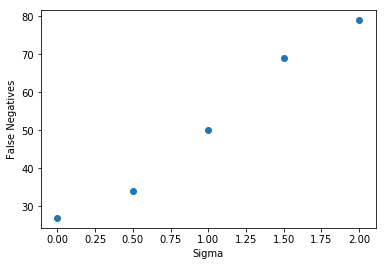

In [17]:
n = 3
alpha = 0.05
dista = 1
distb = 1
num_comparisons = 100
PosNeg = 2  # 1 for positives, 2 for negatives
sigma = np.linspace(0,2, num=5)
false_negs = np.zeros(5)

mua = 1
sigmaa = 1
mub = 3
count = 0
for sigmab in sigma:
    count += 1
    false = 0
    for i in range(1,num_comparisons+1):
        dist1 = np.random.normal(mua, sigmaa, n)
        dist2 = np.random.normal(mub, sigmab, n)
        [stat, pvalue] = ttest_ind(dist1, dist2)
        if PosNeg == 1:
            if pvalue < alpha:
                false += 1
        elif PosNeg == 2:
            if pvalue > alpha:
                false += 1
    false_negs[count-1] = false
plt.scatter(sigma,false_negs);
plt.xlabel('Sigma')
plt.ylabel('False Negatives');
# As the standard deviation increases, the number of false negatives also increases, which makes sense as the distributions will overlap more, making it easier for the ttest to think they are the same distribution.

#### 3f. Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

In [18]:
num_false = np.zeros((28, 3))
alpha = 0.01
dista = 1
distb = 1
num_comparisons = 100

for n in range (3,31):
    num_false[n-3, 0] = n
    num_false_pos = ttestcomparisons(dista, distb, n, alpha, num_comparisons, 1)
    num_false_neg = ttestcomparisons(dista, distb, n, alpha, num_comparisons, 2)
    num_false[n-3, 1] = num_false_pos
    num_false[n-3, 2] = num_false_neg
print(['n    ' 'Pos ' 'Neg'])
print(num_false)
# By decreasing the p-value threshold, there will be fewer false positives because rejecting the null hypothesis becomes more difficult.

['n    Pos Neg']
[[  3.   0.  99.]
 [  4.   0.  99.]
 [  5.   1. 100.]
 [  6.   0.  99.]
 [  7.   2. 100.]
 [  8.   0.  99.]
 [  9.   1. 100.]
 [ 10.   1. 100.]
 [ 11.   1.  99.]
 [ 12.   0.  99.]
 [ 13.   2.  99.]
 [ 14.   2.  98.]
 [ 15.   2.  98.]
 [ 16.   0.  99.]
 [ 17.   2.  99.]
 [ 18.   1. 100.]
 [ 19.   1. 100.]
 [ 20.   0.  99.]
 [ 21.   0. 100.]
 [ 22.   1.  99.]
 [ 23.   1.  99.]
 [ 24.   1. 100.]
 [ 25.   0.  98.]
 [ 26.   2. 100.]
 [ 27.   0.  98.]
 [ 28.   1.  99.]
 [ 29.   0.  98.]
 [ 30.   0. 100.]]


## (5) Shaffer et al

In this excercise we're going to explore some basic concepts of statistics, and use them to build up to some more advanced ideas. To examine these ideas we're going to consider a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment).

In [19]:
repOne = np.loadtxt("expt_rep1.csv")
repTwo = np.loadtxt("expt_rep2.csv")

#### 5a. First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

In [20]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for _ in range(np.int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = 2*nCells # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells*mutationRate) # de novo
        nMuts = 2*nMuts + newMuts       # Previous mutants divide and add
        nCells = nCells - newMuts      # Non-resistant pop goes down by newMuts

    return nMuts

In [21]:
def CVofNRuns():
    Trials = 3000
    nMutsArray = np.zeros(Trials)
    cultureSize = 120000
    mutationRate = 0.0001
    for i in range(1,Trials + 1):
        nMutsArray[i-1] = simLuriaDelbruck(cultureSize, mutationRate)
    return nMutsArray

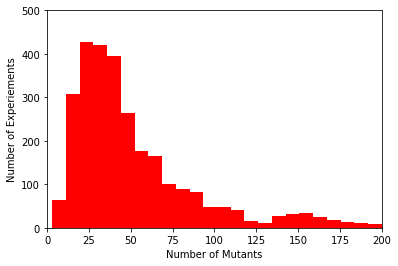

In [31]:
nMutsArray = CVofNRuns()
plt.hist(nMutsArray, bins = 2000, color = 'r')
plt.axis([0, 200, 0, 500])
plt.xlabel('Number of Mutants')
plt.ylabel('Number of Experiements'); 
# The distribution is skewed right. Most trials have a few dozen mutants, while an increasingly small number have thousands of mutants, which I have excluded from this plot to increase the resolution for lower numbers of mutants.

#### 5b. Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test. Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [32]:
MutsDist1 = CVofNRuns()
MutsDist1 = MutsDist1/np.mean(MutsDist1)
MutsDist2 = CVofNRuns()
MutsDist2 = MutsDist2/np.mean(MutsDist2)
print('p-value = %e' % ks_2samp(MutsDist1, MutsDist2)[1])
# because the p-value is below 0.05, these distributions are not consistent with one another, which doesn't make sense as the distributions are sampled from the same population with the same methods.

p-value = 7.245091e-08


#### 5c. Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [33]:
MutsDist1 = CVofNRuns()
MutsDist1 = MutsDist1/np.mean(MutsDist1)
MutsDist3 = repOne/np.mean(repOne)
MutsDist4 = repTwo/np.mean(repTwo)
print('p-value for experiment 1= %.e' % ks_2samp(MutsDist1, MutsDist3)[1])
print('p-value for experiment 2= %.e' % ks_2samp(MutsDist1, MutsDist4)[1])
# because both p-values are below 0.05, this model is not consistent with the Luria-Delbruck experiment data.
# This suggests that the model should be improved to increase its fit.

p-value for experiment 1= 3e-14
p-value for experiment 2= 3e-06


#### 5d. We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

One could set up a for loop to iterate through a series of mutation rates or final numbers of cells and compare the results using the means, or use a bunch of ttests. If the results are the same, then these parameters don't influence our results. If they do, then they do influence our results.